<a href="https://colab.research.google.com/github/DonRoboto/KalmanFilter_v1/blob/main/KalmanFilter_2D_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import math functions
from math import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
#kalman filter 1d
class Kalman_1D():

  def __init__(self, x, y):
    self.x_est = x
    self.x_prd = 0
    self.y_est = y
    self.y_prd = 0
    self.P = 1000
    self.z_x = 0
    self.z_y = 0
    self.K = 0
    self.fit = 1000000
  

In [3]:
def fitness(x, y):
  #Sphere
  #f = x**2.0 + y**2.0

  f = (418.9829 * 2) -  ( ( x * np.sin((np.sqrt(np.abs(x) ) ) ) )  + ( y * np.sin((np.sqrt(np.abs(y) ) ) ) )   )
  #return f

  #Rastrigin 
  #f = 10 + (x**2 - (10*np.cos(2*np.pi*x)))
  return f



In [4]:
class Poblacion():
  p = []

  def __init__(self, n, x_min, x_max):

    for i in range(n):
      x_1 = random.uniform(x_min, x_max)
      y_1 = random.uniform(x_min, x_max)
      ind = Kalman_1D(x_1, y_1)
      self.p.append(ind)

In [5]:
v_min = -500
v_max = 500
n_pob = 20

f_best = 1000000
f_true = 1000000

x_best = 1000000
x_true = 1000000

pob = Poblacion(n_pob, v_min, v_max)

for v in range(n_pob):
  print("x: {}, y: {}".format(pob.p[v].x_est, pob.p[v].y_est))

x: -359.5738455821979, y: 17.07652406165198
x: -60.64324127187359, y: -397.9094762581632
x: -176.5142819453858, y: 416.01896415146996
x: -441.9699178655924, y: -359.35892567373884
x: 13.734343494502468, y: 96.8104847778535
x: 303.4426181494848, y: 127.54812662886434
x: 466.4394214212148, y: 491.5518960961074
x: 373.6191332704709, y: -480.01627698787996
x: -262.16999136187025, y: -280.80385558149214
x: -158.0492876406803, y: 4.658108195717773
x: -87.12369528755357, y: -138.547940685097
x: 345.6838736410715, y: -284.2204161448525
x: -42.777624956316004, y: -159.50566284872616
x: 383.4319349722126, y: 187.87937866292634
x: -85.27095721401946, y: 43.50416138560308
x: -213.6335022574113, y: -214.04067052610753
x: 3.9937251101054017, y: 47.64922588380716
x: -166.47626432636798, y: -471.26486198084194
x: -418.4567968252542, y: -473.1706282760668
x: 115.10422018610257, y: -385.49800939042865


In [6]:

Q = 0.5
R = 0.5


for t in range(100):
   
  #evaluar el fitness de los agentes
  for f in range(n_pob):
    pob.p[f].f = fitness(pob.p[f].x_est, pob.p[f].y_est)

  
  #actualizar x_best y x_true
  for b in range(n_pob):    
    if pob.p[b].f < f_best:
      x_best = pob.p[b].x_est
      y_best = pob.p[b].y_est
      f_best = pob.p[b].f

    if f_best<f_true:
      x_true = x_best
      y_true = y_best
      f_true = f_best


  #predict (the current predicted state, is assumed to be the estimated value)
  for p in range(n_pob):
    pob.p[p].x_prd = pob.p[p].x_est
    pob.p[p].y_prd = pob.p[p].y_est
    pob.p[p].P = pob.p[p].P + Q


  #measure
  for m in range(n_pob):
    r1 = random.uniform(0, 1)
    r2 = random.uniform(0, 1)
    pob.p[m].z_x = pob.p[m].x_prd + np.sin(r1 * 2 * np.pi) * np.abs(pob.p[m].x_prd -  x_true)
    pob.p[m].z_y = pob.p[m].y_prd + np.sin(r2 * 2 * np.pi) * np.abs(pob.p[m].y_prd -  y_true)

  #estimate
  for e in range(n_pob):
    pob.p[e].K = pob.p[e].P / (pob.p[e].P + R)
    pob.p[e].x_est = pob.p[e].x_prd + pob.p[e].K * (pob.p[e].z_x - pob.p[e].x_prd) 
    pob.p[e].y_est = pob.p[e].y_prd + pob.p[e].K * (pob.p[e].z_y - pob.p[e].y_prd) 
    pob.p[e].P = (1 - pob.p[e].K) * pob.p[e].P

    #si sale del rango
    if np.abs(pob.p[e].x_est)>v_max:
      pob.p[e].x_est = random.uniform(v_min, v_max)
      print(pob.p[e].x_est)
    if np.abs(pob.p[e].y_est)>v_max:
      pob.p[e].y_est = random.uniform(v_min, v_max)
      print(pob.p[e].y_est)


print("\n")
print("x_true: {}".format(x_true))
print("y_true: {}".format(y_true))
print("f_true: {}".format(f_true))

-9.688878215469686
44.292966309531835
40.36805230065613
126.26143478113022
-458.49542006885525
-116.79235370080886
-452.4187750684769
265.4924174127548
316.86021961768415
203.19848425727469
-148.32029787287206
45.54957015548234
80.32407103297362
-392.7456915620142
397.8982220496148
-150.54600599494472
13.351150763828628
-156.98083371646766
416.54243868781646
-385.7529049672274
-367.60669583704663
133.7648434298602
468.27257426153756
368.5328497817312
-66.60665297275824
474.61310630219725
-13.875364616925083
465.6710783750982


x_true: 415.17442420384157
y_true: 415.57641656692635
f_true: 7.875993348504153


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


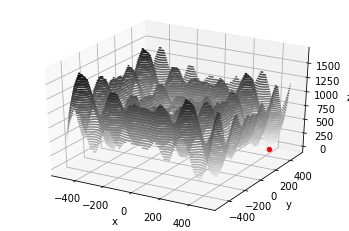

In [12]:



#def f(x, y):
#    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-500, 500, 30)
y = np.linspace(-500, 500, 30)

X, Y = np.meshgrid(x, y)
Z = fitness(X, Y)



fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

ax.scatter(x_true,y_true,f_true, color='red') # plot the point (2,3,4) on the figure


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

